#Модуль А

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime as dt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor

In [ ]:
data = pd.read_csv("albums.csv", sep = "|")
data.drop(['Unnamed: 0'], axis=1, inplace=True)

##Информация о загруженом датасете

In [ ]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
  display(data)

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.0420,0.0298,0.0751,0.5370,0.61500,0.3190,0.000000,0.000022,0.000006,0.125,0.1080,0.0407,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51.0
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,238293.0,0.814,0.826,0.697,0.566,0.816,0.593,10.0,1.0,2.0,0.0,0.0,0.0,0.3440,0.0683,0.1940,0.0810,0.02010,0.2270,0.000023,0.000939,0.000000,0.106,0.1270,0.1100,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67.0
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,160293.0,0.357,0.638,0.670,0.238,0.523,0.700,8.0,1.0,1.0,0.0,1.0,1.0,0.2650,0.3570,0.1960,0.1420,0.00454,0.5760,0.085900,0.000000,0.000005,0.550,0.0842,0.2260,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81.0
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,205373.0,0.640,0.629,0.616,0.707,0.721,0.327,8.0,6.0,5.0,1.0,1.0,1.0,0.0283,0.0277,0.0264,0.0260,0.50200,0.4720,0.000001,0.000000,0.000001,0.182,0.3070,0.1210,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53.0
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,89106.0,0.773,0.488,0.653,0.437,0.311,0.159,9.0,1.0,1.0,1.0,1.0,1.0,0.0963,0.0631,0.0551,0.8360,0.48600,0.8120,0.000024,0.000008,0.000000,0.544,0.1130,0.1550,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181202,181202,Watermelon Hero,2021-07-23,"TisaKorean,",1,Watermelon Hero,NaN,NaN,100179,NaN,NaN,0.680,NaN,NaN,0.434,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.3190,NaN,NaN,0.0626,NaN,NaN,0.000000,NaN,NaN,0.258,NaN,NaN,0.645,NaN,NaN,72.059,NaN,NaN,4.0,NaN,NaN,NaN
181203,181203,Fibonacci,2018-03-04,"Malz Monday,",1,Fibonacci,NaN,NaN,159503,NaN,NaN,0.563,NaN,NaN,0.686,NaN,NaN,5.0,NaN,NaN,0.0,NaN,NaN,0.3480,NaN,NaN,0.0469,NaN,NaN,0.000002,NaN,NaN,0.331,NaN,NaN,0.642,NaN,NaN,176.344,NaN,NaN,4.0,NaN,NaN,NaN
181204,181204,Rewrite The Stars (with James Arthur & Anne-Ma...,2018-10-25,"James Arthur, Anne-Marie,",1,Rewrite The Stars (with James Arthur & Anne-Ma...,NaN,NaN,218293,NaN,NaN,0.670,NaN,NaN,0.743,NaN,NaN,10.0,NaN,NaN,1.0,NaN,NaN,0.0393,NaN,NaN,0.2370,NaN,NaN,0.000000,NaN,NaN,0.465,NaN,NaN,0.571,NaN,NaN,125.944,NaN,NaN,4.0,NaN,NaN,NaN
181205,181205,Mixed Emotions,2019-11-15,"Luh Kel,",12,Hero,Cold Heart,Wrong,127164,134688.0,130876.0,0.535,0.756,0.745,0.627,0.588,0.728,4.0,3.0,0.0,1.0,0.0,1.0,0.3280,0.0551,0.0423,0.1970,0.25300,0.3520,0.000000,0.000000,0.000000,0.110,0.1730,0.2280,0.756,0.637,0.390,149.840,129.882,120.099,4.0,4.0,4.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181207 entries, 0 to 181206
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            181207 non-null  int64  
 1   name          181206 non-null  object 
 2   release_date  181207 non-null  object 
 3   artists       181207 non-null  object 
 4   total_tracks  181207 non-null  int64  
 5   t_name0       181206 non-null  object 
 6   t_name1       127203 non-null  object 
 7   t_name2       122884 non-null  object 
 8   t_dur0        181207 non-null  int64  
 9   t_dur1        127203 non-null  float64
 10  t_dur2        122884 non-null  float64
 11  t_dance0      180957 non-null  float64
 12  t_dance1      127064 non-null  float64
 13  t_dance2      122801 non-null  float64
 14  t_energy0     180957 non-null  float64
 15  t_energy1     127064 non-null  float64
 16  t_energy2     122801 non-null  float64
 17  t_key0        180957 non-null  float64
 18  t_ke

In [ ]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
  display(data.agg(['count', 'size', 'nunique']))

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
count,181207,181206,181207,181207,181207,181206,127203,122884,181207,127203,122884,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,180957,127064,122801,160000
size,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207,181207
nunique,181207,73257,7848,50545,214,68931,42101,39916,53116,32971,31250,1157,1089,1064,2125,1902,1867,12,12,12,2,2,2,1625,1524,1513,4441,4295,4250,5294,5017,5035,1693,1666,1655,1768,1732,1695,41114,29684,28744,5,5,5,96


Имеем дело с датасетом, состоящим из 45 признаков, из которых первые два - индивидуальные(необходимо отбросить), последний - предсказываемый. Также видно, что за исключением айди, названия песни, имени автора, ещё трёх имён песни, даты релиза, а также колонок "*t_mode0*", "*t_mode1*" и "*t_mode2*" все признаки являются вещественными.

Дату релиза необходимо разбить на три значения, т.к. день, месяц и год по-разному могут влиять на целевой признак.

В столбце с датой было обнаружено несколько(малое количество) ячеек, содержащих "0000", что не преобразовывается к дате, поэтому их заполняем модой

In [ ]:
data['release_date'] = data['release_date'].replace('0000', data['release_date'].mode()[0])

In [ ]:
data['release_date'] = pd.to_datetime(data['release_date'])

data['day'] = data['release_date'].dt.day
data['month'] = data['release_date'].dt.month
data['year'] = data['release_date'].dt.year

In [ ]:
data.drop(['release_date'], axis=1, inplace=True)

Отбросим все именные признаки

In [ ]:
data.drop(['id'], axis=1, inplace=True)
data.drop(['name'], axis=1, inplace=True)
data.drop(['artists'], axis=1, inplace=True)
data.drop(['t_name0'], axis=1, inplace=True)
data.drop(['t_name2'], axis=1, inplace=True)
data.drop(['t_name1'], axis=1, inplace=True)

Посмотрим на количество пропусков

In [ ]:
data.isnull().sum()

total_tracks        0
t_dur0              0
t_dur1          54004
t_dur2          58323
t_dance0          250
t_dance1        54143
t_dance2        58406
t_energy0         250
t_energy1       54143
t_energy2       58406
t_key0            250
t_key1          54143
t_key2          58406
t_mode0           250
t_mode1         54143
t_mode2         58406
t_speech0         250
t_speech1       54143
t_speech2       58406
t_acous0          250
t_acous1        54143
t_acous2        58406
t_ins0            250
t_ins1          54143
t_ins2          58406
t_live0           250
t_live1         54143
t_live2         58406
t_val0            250
t_val1          54143
t_val2          58406
t_tempo0          250
t_tempo1        54143
t_tempo2        58406
t_sig0            250
t_sig1          54143
t_sig2          58406
popularity      21207
day                 0
month               0
year                0
dtype: int64

Видно, что в большинстве признаков достаточно большое количество пропусков, значит обычное заполнение средним/модой сработает плохо. Воспользуемся заполнением пропусков на основе данных, в которых пропусков нет, от *sklearn*. Модель обучается на непустых данных и предсказывает, какие значения должны быть на месте пропусков.

In [ ]:
data1 = data.dropna()

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data1)
IterativeImputer(random_state=0)
data = pd.DataFrame(imp.transform(data))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108213 entries, 0 to 159997
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   total_tracks  108213 non-null  int64  
 1   t_dur0        108213 non-null  int64  
 2   t_dur1        108213 non-null  float64
 3   t_dur2        108213 non-null  float64
 4   t_dance0      108213 non-null  float64
 5   t_dance1      108213 non-null  float64
 6   t_dance2      108213 non-null  float64
 7   t_energy0     108213 non-null  float64
 8   t_energy1     108213 non-null  float64
 9   t_energy2     108213 non-null  float64
 10  t_key0        108213 non-null  float64
 11  t_key1        108213 non-null  float64
 12  t_key2        108213 non-null  float64
 13  t_mode0       108213 non-null  float64
 14  t_mode1       108213 non-null  float64
 15  t_mode2       108213 non-null  float64
 16  t_speech0     108213 non-null  float64
 17  t_speech1     108213 non-null  float64
 18  t_sp

In [ ]:
data.columns = data1.columns

In [ ]:
data.isna().sum()

total_tracks    0
t_dur0          0
t_dur1          0
t_dur2          0
t_dance0        0
t_dance1        0
t_dance2        0
t_energy0       0
t_energy1       0
t_energy2       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_acous1        0
t_acous2        0
t_ins0          0
t_ins1          0
t_ins2          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
day             0
month           0
year            0
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86344 entries, 0 to 181206
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_tracks  86344 non-null  float64
 1   t_dur0        86344 non-null  float64
 2   t_dur1        86344 non-null  float64
 3   t_dur2        86344 non-null  float64
 4   t_dance0      86344 non-null  float64
 5   t_dance1      86344 non-null  float64
 6   t_dance2      86344 non-null  float64
 7   t_energy0     86344 non-null  float64
 8   t_energy1     86344 non-null  float64
 9   t_energy2     86344 non-null  float64
 10  t_key0        86344 non-null  float64
 11  t_key1        86344 non-null  float64
 12  t_key2        86344 non-null  float64
 13  t_mode0       86344 non-null  float64
 14  t_mode1       86344 non-null  float64
 15  t_mode2       86344 non-null  float64
 16  t_speech0     86344 non-null  float64
 17  t_speech1     86344 non-null  float64
 18  t_speech2     86344 non-n

Отбросив дубликаты, получаем сокращение количества объектов почти в два раза

Минимальное значение каждого столбца

In [ ]:
data.min(axis=0)

total_tracks       1.000000
t_dur0          1485.000000
t_dur1          4120.000000
t_dur2          2113.000000
t_dance0           0.000000
t_dance1           0.000000
t_dance2           0.000000
t_energy0          0.000000
t_energy1          0.000000
t_energy2          0.000000
t_key0             0.000000
t_key1             0.000000
t_key2             0.000000
t_mode0           -0.351874
t_mode1            0.000000
t_mode2            0.000000
t_speech0         -1.066540
t_speech1         -0.306736
t_speech2         -0.300210
t_acous0          -2.107020
t_acous1          -0.282268
t_acous2           0.000000
t_ins0            -1.768041
t_ins1            -0.436598
t_ins2            -0.193728
t_live0           -0.826849
t_live1           -0.114565
t_live2            0.000000
t_val0            -0.492444
t_val1            -0.442289
t_val2            -0.328380
t_tempo0           0.000000
t_tempo1           0.000000
t_tempo2           0.000000
t_sig0             0.000000
t_sig1             0

Максимальное значение каждого столбца

In [ ]:
data.max(axis=0)

total_tracks    1.190000e+03
t_dur0          1.082819e+07
t_dur1          7.054236e+06
t_dur2          6.145123e+06
t_dance0        9.880000e-01
t_dance1        9.920000e-01
t_dance2        9.850000e-01
t_energy0       2.389291e+00
t_energy1       1.098560e+00
t_energy2       1.036008e+00
t_key0          1.100000e+01
t_key1          1.165130e+01
t_key2          1.100000e+01
t_mode0         1.000000e+00
t_mode1         1.000000e+00
t_mode2         1.000000e+00
t_speech0       9.680000e-01
t_speech1       9.710000e-01
t_speech2       9.700000e-01
t_acous0        9.960000e-01
t_acous1        1.004762e+00
t_acous2        9.960000e-01
t_ins0          1.000000e+00
t_ins1          1.000000e+00
t_ins2          1.000000e+00
t_live0         9.950000e-01
t_live1         9.980000e-01
t_live2         9.960000e-01
t_val0          1.000000e+00
t_val1          1.000000e+00
t_val2          1.000000e+00
t_tempo0        2.965575e+02
t_tempo1        2.485000e+02
t_tempo2        2.463220e+02
t_sig0        

Ниже показана корреляция признаков с помощью *heatmap*, отображающая цветом знак и величину корреляции

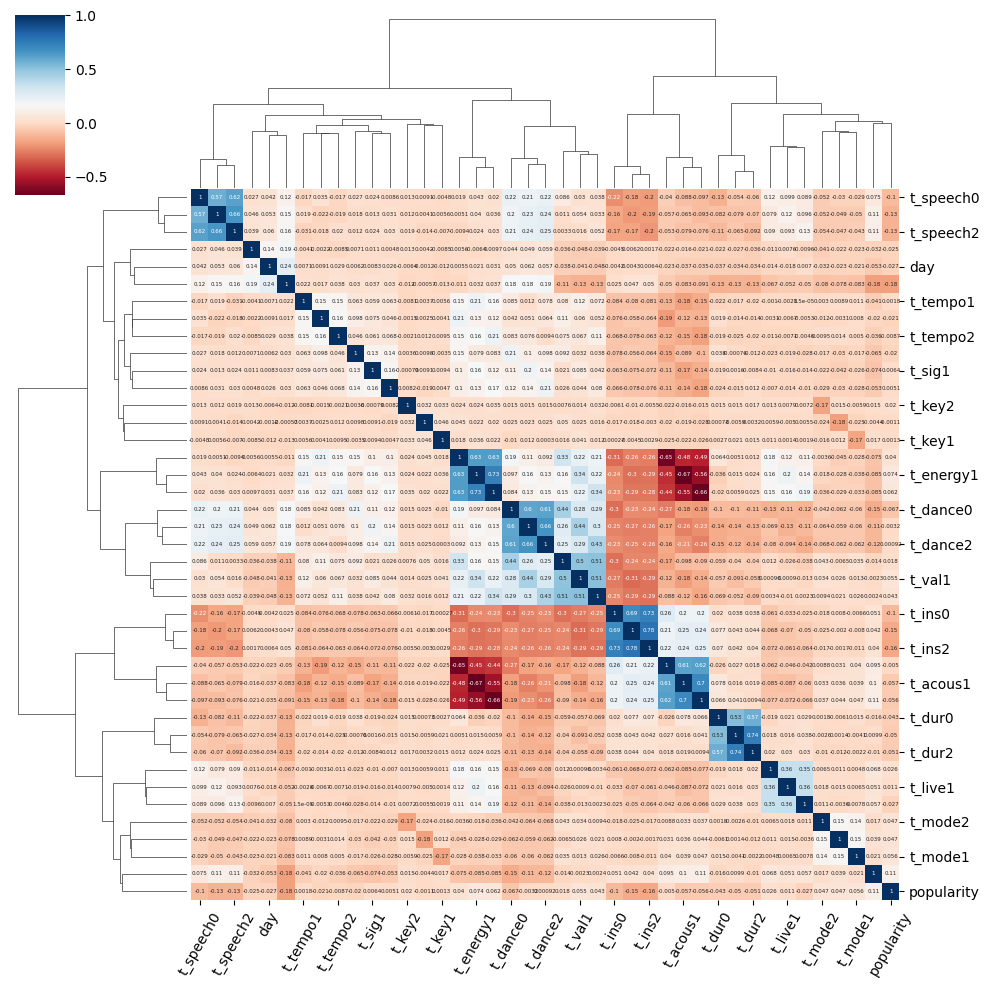

In [ ]:
g = sns.clustermap(data.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 4})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

Видно, что признаки в особенности коррелируют между собой в тройках(видимо, по 3 характеристики каждого свойства трека). Целевой признак сильно мало с чем коррелирует, но определённая зависимость всё равно есть.

In [ ]:
data.to_csv("prepocessed_data.csv", sep='\t', encoding='utf-8')

#Модуль В

In [ ]:
y = data['popularity']
X = data.drop(['popularity'], axis=1)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

##Разделение датасета на обучающую и тренировочную выборки

##Понижение размерности

Для того, чтобы выбрать метод отбора признаков, будем проводить тест на одной модели(ансамбль деревьев, но позже проанализируем и другие модели), чтобы понять, какой метод даст более качественный отбор
Метрики, использующиеся для тестирования - MAE, MSE, R²

Для того, чтобы обучающая и тестовая выборки были примерно сбалансированы, используем случайное разделение. Соотношение размеров выборок обусловлено тем, что модель обучится на бОльшем количестве данных, но для объективности в тренировочной выборке тоже должно быть достаточно объектов

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  bag = BaggingRegressor().fit(X_train, y_train)
  y_pred = bag.predict(X_test)
  print('MAE - ', mean_absolute_error(y_test, y_pred))
  print('MSE - ', mean_squared_error(y_test, y_pred))
  print('R² - ', r2_score(y_test, y_pred))

Рекурсивный отбор наиболее значимых признаков с помощью дерева решений

In [ ]:
tree = DecisionTreeRegressor().fit(X, y)

Посмотрим, сколько признаков лучше выделить

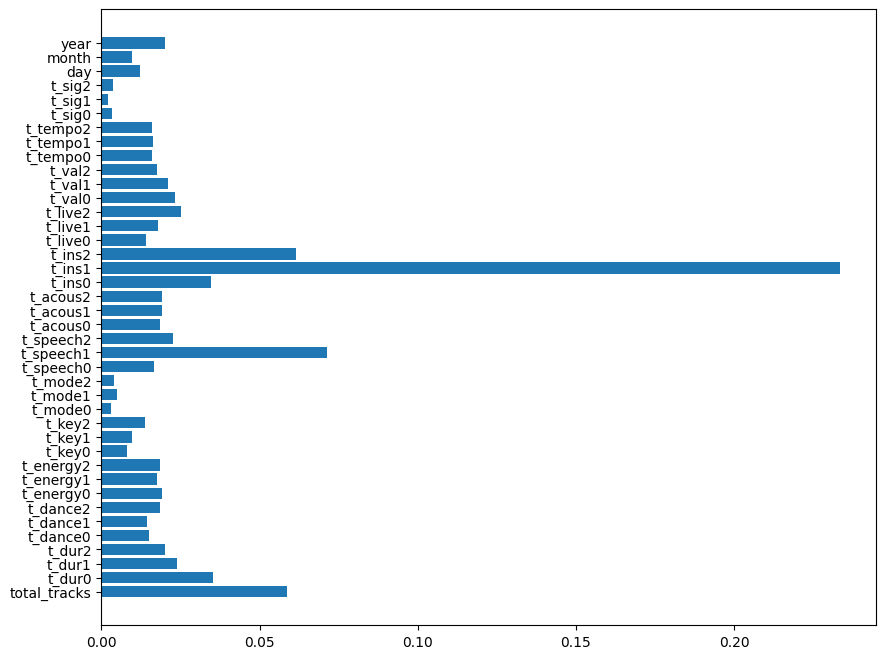

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(width=tree.feature_importances_, y=X.columns);

По графику видно, что явно выделяются 6 признаков

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=6, step=1).fit(X_scaled, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,t_dur0,t_dur1,t_speech1,t_ins1,t_ins2,t_val0
0,222133.0,189133.000000,0.029800,0.000022,0.000006,0.626
1,158826.0,188480.000000,0.068300,0.000939,0.000000,0.158
2,118066.0,185946.000000,0.357000,0.000000,0.000005,0.494
3,203693.0,202533.000000,0.027700,0.000000,0.000001,0.755
4,169973.0,163000.000000,0.063100,0.000008,0.000000,0.707
...,...,...,...,...,...,...
86339,276733.0,250346.000000,0.042800,0.000018,0.000009,0.545
86340,100179.0,196996.022402,0.160593,0.083177,0.060472,0.645
86341,159503.0,199347.632226,0.154625,0.085856,0.057328,0.642
86342,218293.0,208992.542220,0.094877,0.082698,0.076516,0.571


In [ ]:
test(X_rfe, y)

MAE -  10.594264066152709
MSE -  208.8560262122423
R² -  0.39302927830001044


По метрике R² можно понять, что понижение рамерности прошло не очень удачно, значит, важна также зависимость между самими признаками.

Попробуем метод главных компонент, основанный не на отборе, а на преобразовании признаков. Попробуем также понизить пространство до 6

In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(86344, 6)

In [ ]:
test(X_pca, y)

MAE -  14.16561214589999
MSE -  299.71833738556745
R² -  0.1222124989576373


В целях экономии ограниченного времени было принято решение не останавливаться на нелинейном методе понижения размерности *TSNE*

Из двух методов понижения размерности лучше себя показал *rfe*, хоть и с не самым лучшим результатом. Попробуем другие модели регрессии

##Выбор модели

Так как не было обнаружено линейной зависимости с целевым признаком(диаграмма ниже), будет не целесообразно использовать линейную регрессию.

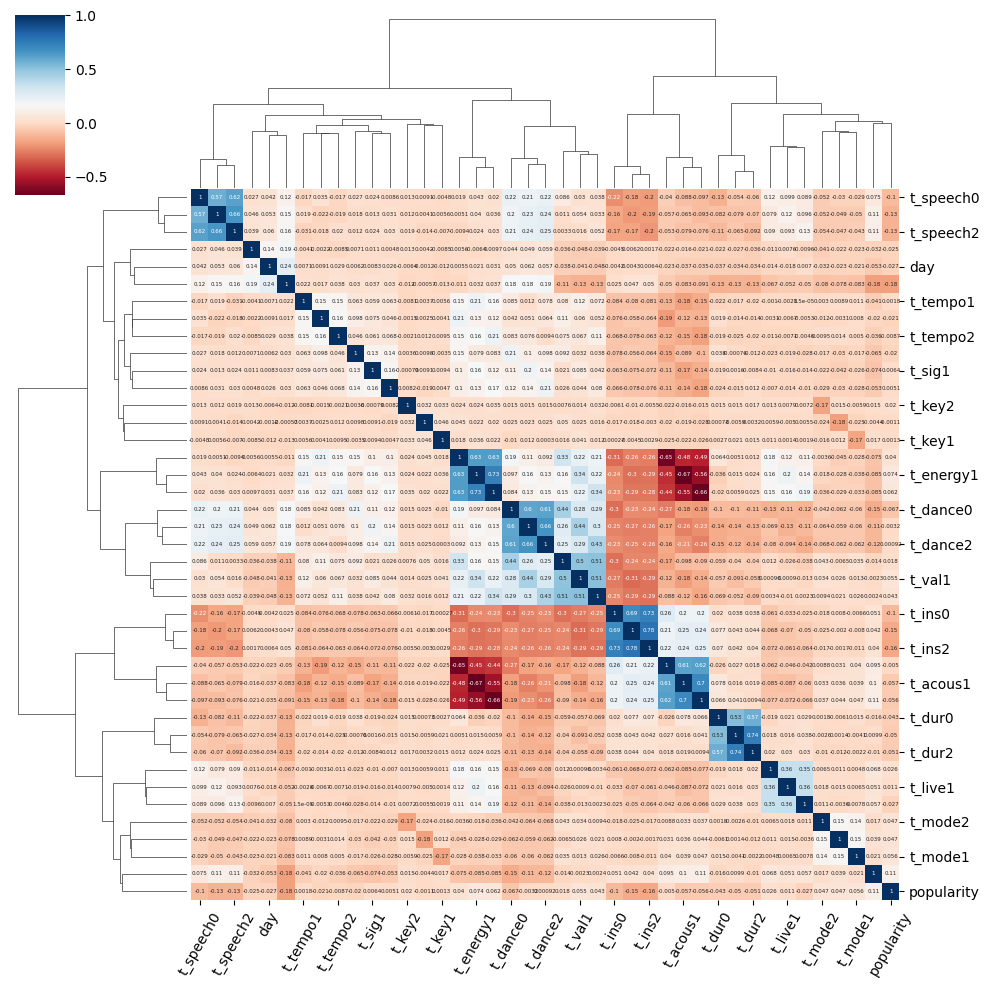

In [ ]:
g = sns.clustermap(data.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 4})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2)

Попробуем ещё один ансамблевый метод - *CatBoostRegressor*

In [ ]:
model = CatBoostRegressor()

In [ ]:
model.fit(X_train, y_train)

Learning rate set to 0.079945
0:	learn: 18.0871367	total: 17.4ms	remaining: 17.4s
1:	learn: 17.7030454	total: 29.8ms	remaining: 14.9s
2:	learn: 17.3738336	total: 40.9ms	remaining: 13.6s
3:	learn: 17.0712575	total: 53.6ms	remaining: 13.3s
4:	learn: 16.8178692	total: 69.4ms	remaining: 13.8s
5:	learn: 16.5991649	total: 80.4ms	remaining: 13.3s
6:	learn: 16.4124017	total: 91.5ms	remaining: 13s
7:	learn: 16.2445809	total: 105ms	remaining: 13.1s
8:	learn: 16.0898391	total: 118ms	remaining: 13s
9:	learn: 15.9604701	total: 130ms	remaining: 12.9s
10:	learn: 15.8457639	total: 144ms	remaining: 13s
11:	learn: 15.7380445	total: 155ms	remaining: 12.8s
12:	learn: 15.6467803	total: 166ms	remaining: 12.6s
13:	learn: 15.5689924	total: 178ms	remaining: 12.5s
14:	learn: 15.4927008	total: 196ms	remaining: 12.9s
15:	learn: 15.4321453	total: 207ms	remaining: 12.7s
16:	learn: 15.3726229	total: 227ms	remaining: 13.1s
17:	learn: 15.3227643	total: 252ms	remaining: 13.7s
18:	learn: 15.2735865	total: 269ms	remainin

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('MAE - ', mean_absolute_error(y_test, y_pred))
print('MSE - ', mean_squared_error(y_test, y_pred))
print('R² - ', r2_score(y_test, y_pred))

MAE -  10.611236908766964
MSE -  202.9171693012104
R² -  0.4095816507425052


Результаты получше, но всё ещё достаточно плохо

Построим нейронную сеть

In [ ]:
import tensorflow as tf

In [ ]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(6,)),
        tf.keras.layers.Dense(32, activation="linear"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

In [ ]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")

In [ ]:
model_regression.fit(X_train, y_train, epochs=20)

Epoch 1/20
2159/2159 [==============================] - 7s 2ms/step - loss: 2958637.0000
Epoch 2/20
2159/2159 [==============================] - 4s 2ms/step - loss: 3066.6011
Epoch 3/20
2159/2159 [==============================] - 4s 2ms/step - loss: 2729.3264
Epoch 4/20
2159/2159 [==============================] - 5s 2ms/step - loss: 1636.4790
Epoch 5/20
2159/2159 [==============================] - 4s 2ms/step - loss: 1007.3171
Epoch 6/20
2159/2159 [==============================] - 5s 2ms/step - loss: 548.6398
Epoch 7/20
2159/2159 [==============================] - 5s 2ms/step - loss: 5662.5312
Epoch 8/20
2159/2159 [==============================] - 4s 2ms/step - loss: 2220.4829
Epoch 9/20
2159/2159 [==============================] - 5s 2ms/step - loss: 344.3797
Epoch 10/20
2159/2159 [==============================] - 4s 2ms/step - loss: 343.4343
Epoch 11/20
2159/2159 [==============================] - 4s 2ms/step - loss: 343.4185
Epoch 12/20
2159/2159 [==============================

In [ ]:
y_pred =  model_regression.predict(X_test)

540/540 [==============================] - 1s 1ms/step


In [ ]:
print('MAE - ', mean_absolute_error(y_test, y_pred))
print('MSE - ', mean_squared_error(y_test, y_pred))
print('R² - ', r2_score(y_test, y_pred))

MAE -  15.803910235718584
MSE -  342.34518017562027
R² -  -9.975435521614173e-05


Нейронная сеть показала плохой результат, так как R² вообще отрицательный

Стоит отметить, что во всех моделях неплохие метрики *MAE* и *MSE*

Выбор очевиден - *CatBoost*

Попробуем обучить эту модель на полном признаковом пространстве(время обучения позволяет, да и переобучения тут и близко нет)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model1 = CatBoostRegressor()

In [ ]:
model1.fit(X_train, y_train)

Learning rate set to 0.079945
0:	learn: 18.0289451	total: 44.2ms	remaining: 44.1s
1:	learn: 17.6134201	total: 76.2ms	remaining: 38s
2:	learn: 17.2634975	total: 108ms	remaining: 36s
3:	learn: 16.9542958	total: 136ms	remaining: 33.9s
4:	learn: 16.6764423	total: 165ms	remaining: 32.8s
5:	learn: 16.4180496	total: 196ms	remaining: 32.5s
6:	learn: 16.2007285	total: 225ms	remaining: 31.9s
7:	learn: 16.0151915	total: 255ms	remaining: 31.6s
8:	learn: 15.8464803	total: 284ms	remaining: 31.3s
9:	learn: 15.6946589	total: 313ms	remaining: 31s
10:	learn: 15.5676318	total: 340ms	remaining: 30.6s
11:	learn: 15.4627848	total: 379ms	remaining: 31.2s
12:	learn: 15.3712145	total: 411ms	remaining: 31.2s
13:	learn: 15.2841807	total: 439ms	remaining: 30.9s
14:	learn: 15.1936807	total: 468ms	remaining: 30.7s
15:	learn: 15.1195058	total: 495ms	remaining: 30.4s
16:	learn: 15.0475972	total: 519ms	remaining: 30s
17:	learn: 14.9839335	total: 545ms	remaining: 29.7s
18:	learn: 14.9127251	total: 574ms	remaining: 29.6

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
print('MAE - ', mean_absolute_error(y_test, y_pred))
print('MSE - ', mean_squared_error(y_test, y_pred))
print('R² - ', r2_score(y_test, y_pred))

MAE -  8.669920089155173
MSE -  155.5521177301429
R² -  0.5505459658630758


R² чуть-чуть поднялся, это уже хорошо

In [ ]:
import pickle

In [ ]:
with open('CatBoost_model.pickle', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
data.to_csv('dataset.csv', index=False)

#Модуль С

In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=faab7849b223d26aeb2f11108615751e49b1769dd083281bdf3a110d8200bf33
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st
import pickle
from PIL import Image
import requests
from io import BytesIO


def main():
    with open("CatBoost_model.pickle", 'rb') as mf:
      catb = pickle.load(mf)
    data = pd.read_csv("dataset.csv")

    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание данных", "Информация о моделях", "Предсказание"]
    )

    if page == "Описание данных":
        st.title("Описание данных")
        st.header("Популярность музыкальных альбомов")
        st.write("На популярность музыкального альбома влияет много факторов - начиная от артиста и заканчивая характеристиками отдельных треков (продолжительность, музыкальность, степень позитива ,энергетика, тональность и др.).")
        st.write("Изначально в датасете содержались название альбома, его айди, имена исполнителей и ещё 3 именных столбца. Также был столбец с датой выхода. Помимо этих столбцов, все остальные признаки являются числовыми.")
        st.write("В рамках предобработки удалены пропуски в данных, произведено масштабирование признаков с помощью MinMaxScaler, были выброшены именные столбцы, дата преобразована в три столбца, а также удалены все дубликаты строк.")
        st.write(data.head())

        response = requests.get('https://s1.1zoom.ru/b4649/226/Cats_Glasses_Headphones_Smartphone_Ginger_color_516065_2560x1440.jpg')
        image = Image.open(BytesIO(response.content))
        st.image(image, caption='слушает и не подозревает, что я сейчас предсказываю рейтинг его любимой песни')

    elif page == "Информация о моделях":

        st.title("Информация о моделях")

        st.markdown("## Были протестированы 3 модели - BaggingRegressor, Нейронная сеть и CatBoost")
        st.markdown("### _Bagging_ - ансамблевый алгоритм. В данной задаче использовался ансамбль решающих деревьев")
        st.markdown("**MAE** -  10.594264066152709")
        st.markdown("**MSE** -  208.8560262122423")
        st.markdown("**R²** -  0.39302927830001044")
        st.markdown("### _CatBoost_ - алгоритм, основанный на градиентном бустинге решающих деревьев.")
        st.markdown("**MAE** -  8.669920089155173")
        st.markdown("**MSE** -  155.5521177301429")
        st.markdown("**R²** -  0.5505459658630758")
        st.markdown("### _Нейронная сеть_ - алгоритм, основанный на связях человеческого мозга. В данной задаче использовалась нейронная сеть с 3 внутренними слоями с 64, 32 и 16 нейронами и 1 выходной слой с 1 нейроном. В качестве функции активации были использованы _relu_ и линейная функция. Также на двух слоях были дропнуты 10% нейронов.")
        st.markdown("**MAE** -  15.803910235718584")
        st.markdown("**MSE** -  342.34518017562027")
        st.markdown("**R²** -  -9.975435521614173e-05")


    elif page == "Предсказание":
        st.title("Предсказание")
        st.info(
          """
          Заполните все характеристики, чтобы предсказать популярность альбома.
          """
        )

        t_dur0 = st.slider("Выберите **t_dur0**", 1485.0, 10828190.0, 145343.0, step=0.5)
        t_dur1 = st.slider("Выберите **t_dur1**", 4120.0, 7054236.0, 145343.0, step=0.5)
        t_speech1 = st.slider("Выберите **t_speech1**", -0.306736, 0.971000, 0.000000, step=0.005000)
        t_ins1 = st.slider("Выберите **t_ins1**", -0.436598, 1.000000, 0.000000, step=0.005000)
        t_ins2 = st.slider("Выберите **t_ins2**", -0.193728, 1.000000, 0.000000, step=0.005000)
        t_val0 = st.slider("Выберите **t_val0**", -0.492444, 1.000000, 0.000000, step=0.005000)

        if st.button('Предсказать'):

          columns = ["t_dur0", "t_dur1", "t_speech1", "t_ins1", "t_ins2", "t_val0"]
          df = pd.DataFrame([[t_dur0, t_dur1, t_speech1, t_ins1, t_ins2, t_val0]], columns=columns)

          catb_pred = catb.predict(df)
          st.markdown("Предсказанное значение _CatBoost_")
          st.write(pd.DataFrame(catb_pred, columns=['Предсказания']))


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.586s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



Айпи ниже необходимо ввести на странице стримлита

In [ ]:
! curl https://ipinfo.io/ip

35.229.222.145

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
! fuser -k 8501/tcp

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.795s
your url is: https://kind-rockets-sell.loca.lt
^C
